## Detekcia anomálií a outlierov

Outliery a anomálie je možné hľadať viacerými spôsobmi.

Outliery je jednoduché hľadať napr. pomocou rôznych vizualizácií, ak hľadáme outliery v rámci jednotlivých atribútov alebo v rámci kombinácie hodnôt malého počtu atribútov. 

Z jednoduchých vizualizačných techník pre detekciu outlierov môžeme použiť:

### Úloha 13.7:

Ktoré vizualizačné techniky podporované knižnicou Seaborn môžeme priamo použiť pre detekciu outlierov?
Použite zvolené techniky pre detekciu outlierov v rámci datasetu Titanic. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = pd.read_csv("../data/titanic-processed.csv")
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family,has_family,fare_ordinal,title,title_short,age_ordinal,deck
0,1,1,female,29.00,0,0,24160,211.3375,B5,Southampton,0,False,most expensive,Miss,Miss,adult,B
1,1,1,male,0.92,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Master,rare title,child,C
2,1,0,female,2.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Miss,Miss,child,C
3,1,0,male,30.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mr,Mr,adult,C
4,1,0,female,25.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mrs,Mrs,adult,C


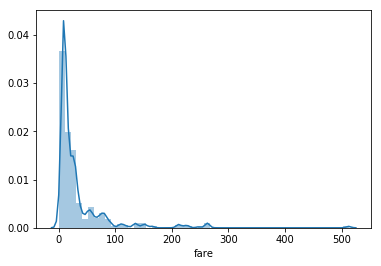

In [4]:
# YOUR CODE HERE
g = sns.distplot(titanic['fare'])

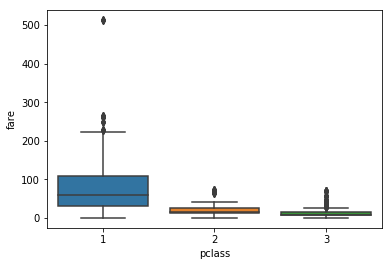

In [5]:
# YOUR CODE HERE
g = sns.boxplot(x='pclass', y='fare', data = titanic) ###kombinacia dvoch atributov, diamanty su outliery

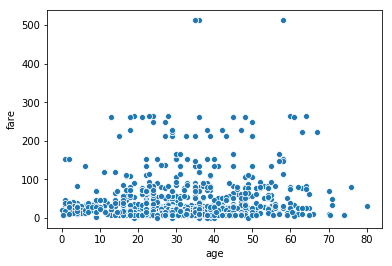

In [6]:
# YOUR CODE HERE
g = sns.scatterplot(x='age', y='fare', data = titanic)

Okrem takýchto vizualizácií je možné outliery detegovať pomocou zhlukovacích algoritmov. V takom prípade je vhodné použiť takú metódu, ktorá nám deteguje málo-početné zhluky, ktoré sú vzdialené od štandardných príkladov. Na detekciu môžeme teda použiť metódy založené na hustote (ako napr. DBSCAN), kde nastavíme faktor vzdialenosti bodov patriacich do zhluku tak, aby sme odlíšili všetky štandardné príklady od tých vzdialených, ktoré považujeme za outliery. 

Na príklade datasetu Titanic si demonštrujeme použitie metódy DBSCAN pre detekciu outlierov z pohľadu atribútov `age` a `fare`. 

In [7]:
# predspracujeme dáta rovnako ako v píkladoch z predoškých cvičení:
# - odstránime atribúty, ktoré nebudeme používať (napr. duplicitné)
# - binárne a ordinálne atribúty namapujeme na indexy
# - kategorické atribúty bez usporiadania transformujeme pomocou One Hot prístupu

titanic = titanic.drop(columns=['cabin','deck','ticket','title'])
titanic['sex'] = titanic['sex'].map({"male": 0, "female": 1})
titanic['has_family'] = titanic['has_family'].map({False: 0, True: 1})
titanic['fare_ordinal'] = titanic['fare_ordinal'].map({"normal": 0, "more expensive": 1, "most expensive": 2}) 
titanic['age_ordinal'] = titanic['age_ordinal'].map({"child": 0, "young": 1, "adult": 2, "old": 3}) 
titanic = pd.get_dummies(titanic, columns=['embarked', 'title_short'])

Natrénujeme model DBSCAN s definovanou hodnotou parametra `eps`. Skúsime nájsť správnu hodnotu parametra tak, aby vhodne separovala príklady do zhlukov - cieľom je "oddeliť" ouliery od štandardných príkladov. 

Výsledky potom môžeme vykresliť pomocou Seaborn knižnice a jej bodového grafu (scatter plot). 

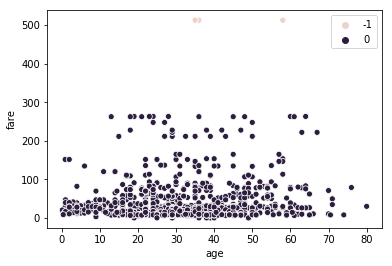

In [8]:
from sklearn.cluster import DBSCAN ####reprezentant metody zalozenej na hustote

dbscan = DBSCAN(eps=100) # inicializujeme DBSCAN model pre definovanú hodnotu minimálnej vzdialenosti

labels = dbscan.fit_predict(titanic) # natrénujeme model na vstupných dátach

g = sns.scatterplot(x='age', y='fare', hue=labels, data=titanic) # vykreslíme bodový graf, farebne rozlíšený podľa zhlukov

Okrem jednoduchých vizualizačných techník a nízko-rozmerných dát vieme použiť zhlukovanie na detekciu anomálií v dátach. Obvykle je tieto metódy dobré použiť aj tam, kde sa jedná o predikčnú úlohu s veľmi nevybalansovaným cieľovým atribútom - minoritnú triedu tak môžeme "odhaliť" pomocou zhlukovania.

Ako príklad si ukážeme ako detegovať podozrivé transakcie v dátach popisujúcich transakcie vykonané pomocou kreditných kariet. 

Pochopenie a interpretácia dát je obtiažna - jedná sa o transformované príznaky, ktoré sú zakódované, vieme len, že sa jedná o atribúty platiteľa a samotnej platby. 

In [10]:
from sklearn.preprocessing import normalize # importujeme používané knižnice
from sklearn.metrics import confusion_matrix

data=pd.read_csv("../data/creditcard.csv") # načítame dáta do dátového rámca zo súboru
data.head() # vypíšeme na obrazovku prvých 5 záznamov #####iba Amount vieme urcit, ostatne su zakodovane zaznamy ktore netusime co su

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,57059.0,-1.676914,1.833189,1.064455,1.022677,-0.348515,-0.260089,0.571703,0.087740,1.389579,...,-0.284230,0.003012,-0.050973,0.326058,0.057656,-0.234956,0.878143,0.360395,4.49,0
1,51852.0,0.924950,-0.213837,-0.032731,1.319221,-0.197841,-0.383864,0.377383,-0.101001,0.201356,...,0.071886,0.051645,-0.237300,0.092543,0.697644,-0.260243,-0.004321,0.033677,146.05,0
2,156827.0,2.122316,-0.962503,-2.525940,-1.676110,1.626630,3.408812,-1.529461,0.941478,-0.095372,...,0.238221,0.661569,0.142103,0.604128,-0.112563,-0.067314,0.048173,-0.017584,19.95,0
3,29665.0,-0.312036,0.985183,0.825916,-0.214672,0.619764,0.033632,0.534933,0.189402,-0.172033,...,-0.315258,-0.845000,-0.101595,-1.013687,-0.134905,0.167538,0.254659,0.082334,1.29,0
4,93556.0,1.945526,0.443728,-1.480387,1.663597,0.422412,-1.158939,0.295986,-0.444085,1.439472,...,0.086364,0.600263,-0.044614,-0.156026,0.270776,-0.459994,-0.006162,-0.023219,39.00,0


Pozrieme sa na distribúciu cieľového atribútu:

In [11]:
print(data["Class"].value_counts())

0    28425
1       56
Name: Class, dtype: int64


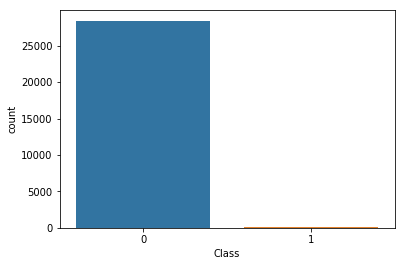

In [12]:
g = sns.countplot(x='Class', data=data)

Dataset transformujeme rovnako ako pri predikčných úlohách - odseparujeme si maticu príznakov a vektor hodnôt cieľového atribútu `Class`. Ten môžeme potom použiť pre verifikáciu. 

In [13]:
data_sampled = data.sample(frac=.10) #prikazom sample so vytvorime 10 percentnu vzorku z celej mnoziny dat

In [15]:
data_sampled["Class"].value_counts() ###skontrolujeme, ci sa zachoval pomer hodnot cieloveho atributu

0    2844
1       4
Name: Class, dtype: int64

In [17]:
features=data_sampled.drop(["Time","Class"],axis=1)
labels=pd.DataFrame(data_sampled[["Class"]])

Dátový rámec s maticou príznakov normalizujeme.

In [23]:
from sklearn.preprocessing import normalize
features=normalize(features)

Teraz skúsime natrénovať zhlukovací model. Cheme natrénovať model tak, aby nám oddelil vhodným spôsobom triedy predstavujúce anomálie od majoritných transakcií. Porovnáme potom výsledky zhlukovania so skutočnými hodnotami, ktoré uchovávame vo vektore hodnôt cieľového atribútu.

In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

kmeans=KMeans(n_clusters=2, max_iter=300) ###2 zhluky, idealne jeden dobry a druhy s tymi outliermi
#kmeans.fit(features)
#y_kmeans=kmeans.predict(features)

dbscan = DBSCAN(eps=0.8)
y_dbscan = dbscan.fit_predict(features)

Výsledky zhlukovania môžeme vyjadriť aj početnosťou zhlukov. Tá nám dá aspoň približný odhad kvality zhlukovacieho modelu (pomer príkladov v zhlukoch). Samozjreme, nehovorí ešte nič o tom, či príklady v jednotlivých zhlukoch skutočne zodpovedajú aj priradeniu tried. 

In [30]:
#clusters, counts = np.unique(y_kmeans, return_counts=True) # pomocou funkcie unique identifikujeme rôzne hodnoty a vrátime aj ich počty
#print(np.asarray((clusters, counts))) 

clusters, counts = np.unique(y_dbscan, return_counts=True) # pomocou funkcie unique identifikujeme rôzne hodnoty a vrátime aj ich počty
print(np.asarray((clusters, counts))) #####cize Kstredove meansy nie su dobre

[[  -1    0]
 [  17 2831]]


In [32]:
#print(confusion_matrix(labels,y_kmeans))

y_dbscan[y_dbscan == -1] = 1
print(confusion_matrix(labels ==1,y_dbscan == -1))

[[2844    0]
 [   4    0]]


In [33]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0019700967458223394


Pre hľadanie outlierov môžeme použiť aj metódu Local Outlier Factor.

In [36]:
from sklearn.neighbors import LocalOutlierFactor # importujeme knižnice

lof = LocalOutlierFactor(n_neighbors=50, metric='minkowski', contamination = outlier_fraction) # vytvoríme model, počíta sa hustota v okolí každého príkladu (počet susedov)
y_lof = lof.fit_predict(features) # natrénujeme model
#scores_prediction = lof.negative_outlier_factor_ 

In [37]:
y_lof[y_lof == 1] = 0
y_lof[y_lof == -1] = 1

print(confusion_matrix(labels,y_lof))

[[2838    6]
 [   4    0]]
